In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load) 
ride_df = pd.read_csv(ride_data_to_load) 
# Combine the data into a single dataset
merge_df = pd.merge(ride_df,city_df, on="city", how="left") 
# Display the data table for preview
merge_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

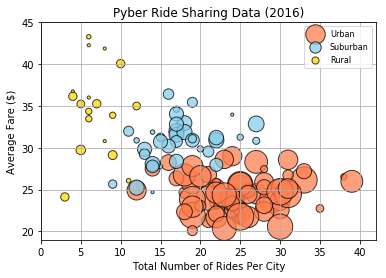

In [3]:
# Obtain the x and y coordinates for each of the three city types
grouped_df = merge_df.groupby("city")
summary_df = pd.DataFrame(grouped_df["fare"].mean())
summary_df ["rides_per_city"] = pd.DataFrame(grouped_df["fare"].count())
summary_df ["driver_count"] = pd.DataFrame(grouped_df["driver_count"].first())
summary_df ["cityType"] = pd.DataFrame(grouped_df["type"].unique())
urban_df = summary_df.loc[summary_df["cityType"] == "Urban"]
suburban_df = summary_df.loc[summary_df["cityType"] == "Suburban"]
rural_df = summary_df.loc[summary_df["cityType"] == "Rural"]

# Build the scatter plots for each city types
urban_plt = plt.scatter(urban_df["rides_per_city"], urban_df["fare"], marker="o", facecolors="Coral", edgecolors="black",
            s=urban_df["driver_count"] * 10, alpha=0.75)
suburban_plt = plt.scatter(suburban_df["rides_per_city"], suburban_df["fare"], marker="o", facecolors="SkyBlue", edgecolors="black",
            s=suburban_df["driver_count"]* 10, alpha=0.75)
rural_plt = plt.scatter(rural_df["rides_per_city"], rural_df["fare"], marker="o", facecolors="Gold", edgecolors="black",
            s=rural_df["driver_count"]* 10, alpha=0.75)
# Incorporate the other graph properties
plt.ylim(19,45)
plt.xlim(0,42)
plt.grid()
# Create a legend
plt.legend((urban_plt, suburban_plt, rural_plt),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")

# Save Figure
plt.savefig("../Images/PyberRideSharingScatterPlot.png")
plt.show()

## Total Fares by City Type

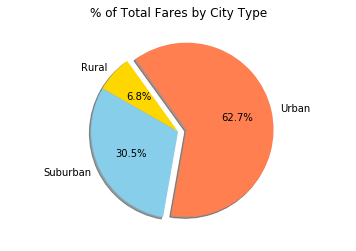

In [4]:
# Calculate Type Percents
summary_totalfares_df = pd.DataFrame(grouped_df["fare"].sum())
summary_totalfares_df ["cityType"] = pd.DataFrame(grouped_df["type"].unique())
urban_tf_df = summary_totalfares_df.loc[summary_totalfares_df["cityType"] == "Urban"]
suburban_tf_df = summary_totalfares_df.loc[summary_totalfares_df["cityType"] == "Suburban"]
rural_tf_df = summary_totalfares_df.loc[summary_totalfares_df["cityType"] == "Rural"]
urban_fare = urban_tf_df["fare"].sum()
suburban_fare = suburban_tf_df["fare"].sum()
rural_fare = rural_tf_df["fare"].sum()

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
colors = ["coral", "gold", "skyblue"]
values = [urban_fare, rural_fare, suburban_fare]

explode = (0.1, 0, 0)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)

# Save Figure
plt.savefig("../Images/PyberRideSharingTotalFares.png")
plt.show()

## Total Rides by City Type

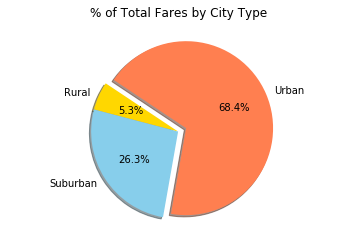

<Figure size 432x288 with 0 Axes>

In [5]:
# Calculate Ride Percents
urban_count = urban_df["rides_per_city"].sum()
suburban_count = suburban_df["rides_per_city"].sum()
rural_count = rural_df["rides_per_city"].sum()

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
colors = ["coral", "gold", "skyblue"]
values = [urban_count, rural_count, suburban_count]

explode = (0.1, 0, 0)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.show()
# Save Figure
plt.savefig("../Images/PyberRideSharingTotalRides.png")
plt.show()

## Total Drivers by City Type

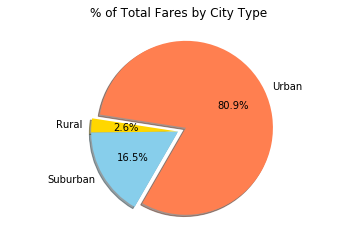

In [6]:
# Calculate Driver Percents

urban_dcount = urban_df["driver_count"].sum()
suburban_dcount = suburban_df["driver_count"].sum()
rural_dcount = rural_df["driver_count"].sum()

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
colors = ["coral", "gold", "skyblue"]
values = [urban_dcount, rural_dcount, suburban_dcount]

explode = (0.1, 0, 0)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
# Save Figure
plt.savefig("../Images/PyberRideSharingTotalDrivers.png")
plt.show()